# CDC Botulism Data EDA

By Eric Wilson

Botulism is a rare illness caused by eating food that has spoiled, with few cases occuring per year in the United States. It is believed to be the illness that killed Buddha, and, although uncommon, still exists and is often fatal.

The data set used in this notebook is from the CDC's open data portal.

With the available data, we will seek to explore these questions: 
- Which types of botulism are most common?
- In which years have botulism deaths spiked? 
- In which States are botulism deaths most and least common?


## Importing Libraries, Data, and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/cdc-botulism/66i6-hisz.csv')

In [3]:
df.head()

,state,year,bottype,toxintype,count
0,Alaska,1947,Foodborne,Unknown,3
1,Alaska,1948,Foodborne,Unknown,4
2,Alaska,1950,Foodborne,E,5
3,Alaska,1952,Foodborne,E,1
4,Alaska,1956,Foodborne,E,5


In [4]:
df.isna().sum()

state        15
year          0
bottype       0
toxintype     0
count         0
dtype: int64

In [5]:
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(985, 5)

In [6]:
print('Number of cases:', df['count'].sum())
print('Number of States:', df['state'].nunique())
print('Range of years:', df.year.min(), '-', df.year.max())
print('Types of Botulism:', df.bottype.unique())

Number of cases: 3972
Number of States: 19
Range of years: 1899 - 2017
Types of Botulism: ['Foodborne' 'Infant' 'Wound' 'Other']


This dataset, once null values are removed, examines 3,972 cases of botulism in the US from 1899 to 2017, over the scope of 19 states. The types of botulism are catagorized as "Foodborne," "Infant," "Wound," or "Other." 


## Data Exploration

### Types of Botulism

First, let's take a look at what forms of botulism have the highest deaths reported with them. 

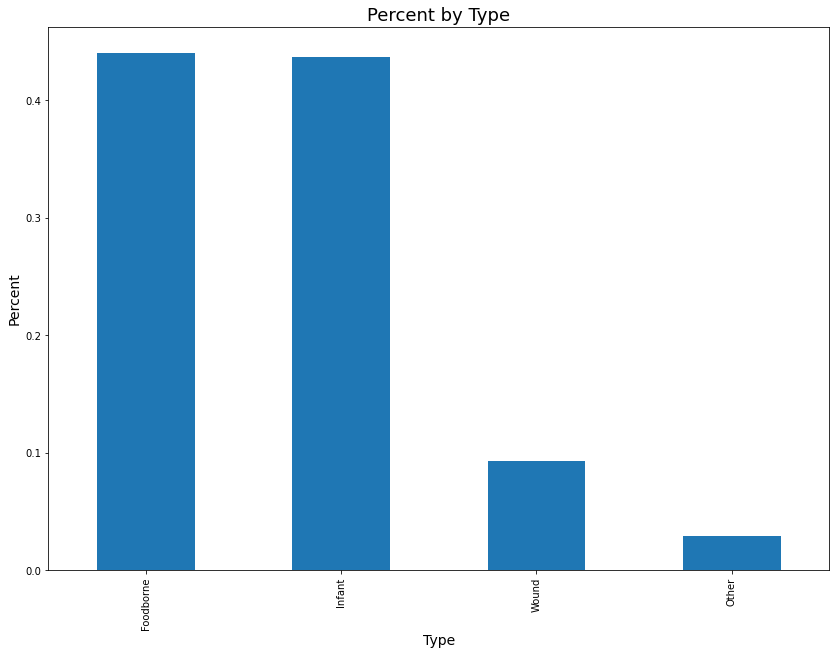

In [7]:
dfbot = (df.bottype.value_counts() / df.bottype.count())
dfbot.plot(kind = 'bar', figsize = (14,10))  

plt.xlabel("Type", fontsize = 14)
plt.ylabel("Percent", fontsize = 14)
plt.title("Percent by Type", fontsize = 18)

plt.show()

Both foodborne and infant botulism have the highest death tolls associated with them, each accounting for over 40% of botulism related deaths in the data set. 

There is a chance that a certain bacteria lives in honey, which, after about one year of age, a human's body becomes able to process it - prior to one's first birthday, however, there is a possibility of infants getting and dying from botulism found in that same honey.

As a father who just celebrated his son's first birthday, I have been cautious (if you ask his grandparents, perhaps even over cautious) of feeding my son certain foods. There is a chance that a certain bacteria lives in honey, which, after about one year of age, a human's body becomes able to process it. Having read about this prior to finding this dataset, it was one of the initial things that drew me to it. Let's look at the number of infant botulism cases over time.

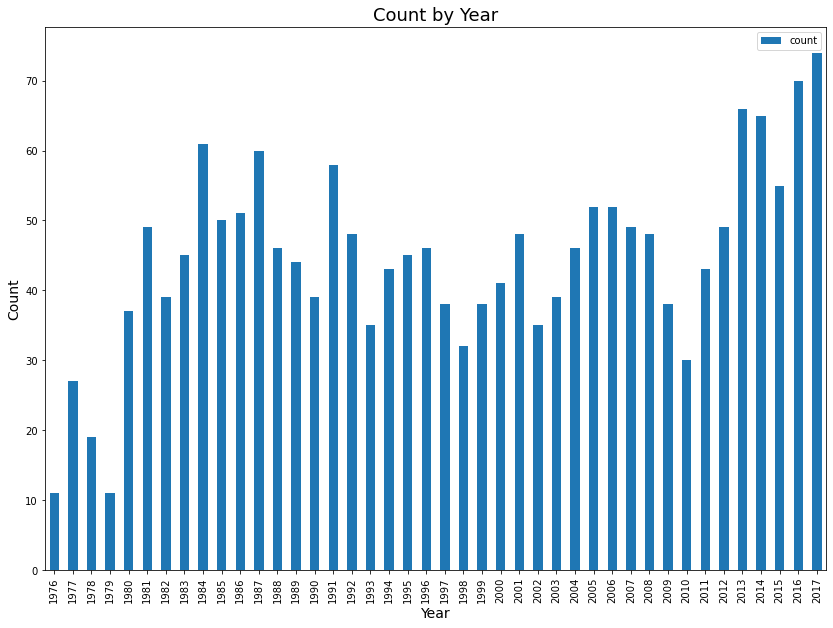

In [8]:
dfib = df[df['bottype'] == 'Infant']
dfib = dfib[['year', 'count']]
dfib = dfib.groupby(['year']).sum()
dfib.plot(kind = 'bar', figsize = (14,10))  

plt.xlabel("Year", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Count by Year", fontsize = 18)

plt.show()

Strictly speaking, the number of deaths due to infant botulism have gone up since 1976.

### Cases by Year

What year or years have the highest number of cases of botulism? Have rates gone up or down?

In [9]:
dfyc = df[['year', 'count']]
dfyc = dfyc.groupby(['year']).sum()

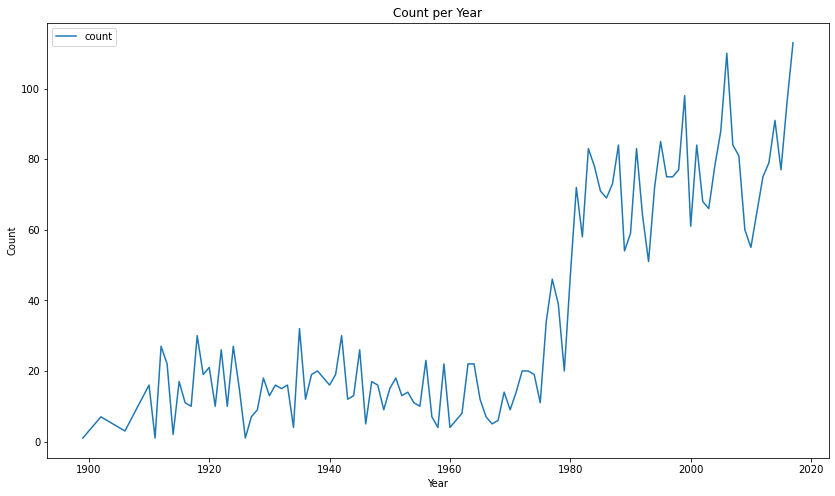

In [10]:
dfyc.plot(kind = 'line', figsize = (14,8))  

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Count per Year")

plt.show()

Cases of botulism have increased over the range of years present in the dataset; the two initial reasons for this may be an increase in population, and a better understanding (and, therefore, reporting) of botulism and cause of death.  

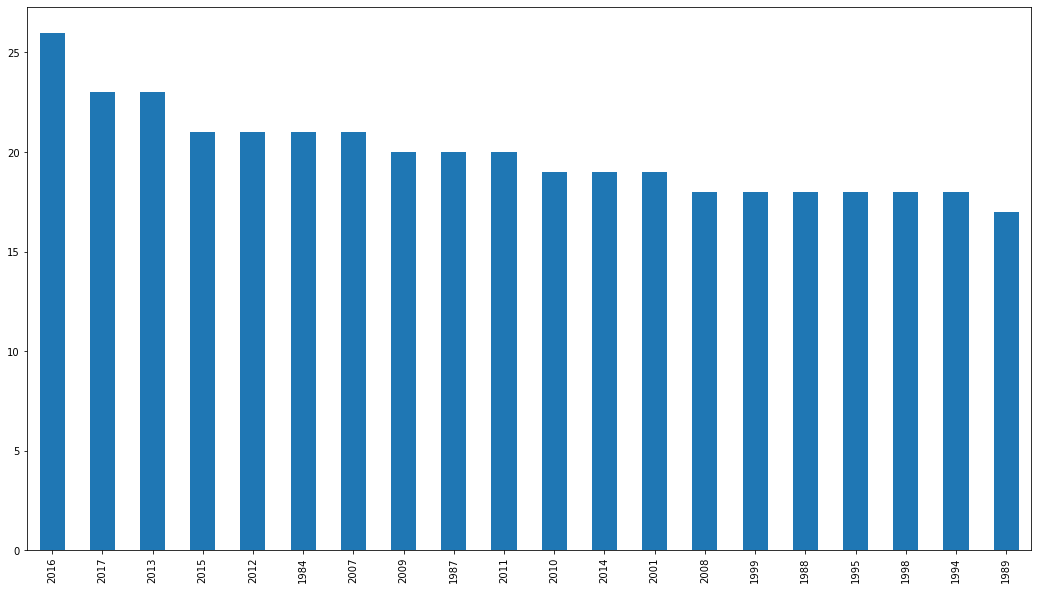

In [11]:
df.year.value_counts().head(20).plot(kind='bar', figsize = (18,10))

As hypothesized, the number of times a year appears accounts for an additional state reporting in that year; of the top 20 years reported, the earliest year was 1984 (33 years from 2017, the most recent year). If a state does not report for a year, it means no deaths due to botulism were reported, but not necessarily that no deaths happened. 

Let's take a look at the average number of deaths per year - this should help adjust for the increased number of states.

In [12]:
dfyca = df[['year', 'count']]
dfyca = dfyca.groupby(['year']).mean()

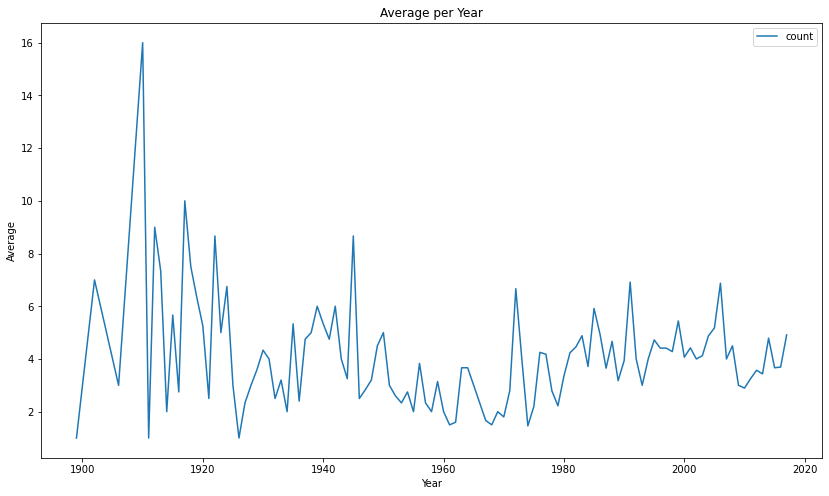

In [13]:
dfyca.plot(kind = 'line', figsize = (14,8))  

plt.xlabel("Year")
plt.ylabel("Average")
plt.title("Average per Year")

plt.show()

Based on the average, it appears as though the number of deaths per year have dropped in the past century, but not drastically in the past 80 or so years.

### Botulism by States

What state or states have the highest and lowest aggregate cases of botulism? 

In [14]:
dfsc = df[['state', 'count']]
dfsc = dfsc.groupby(['state']).sum()

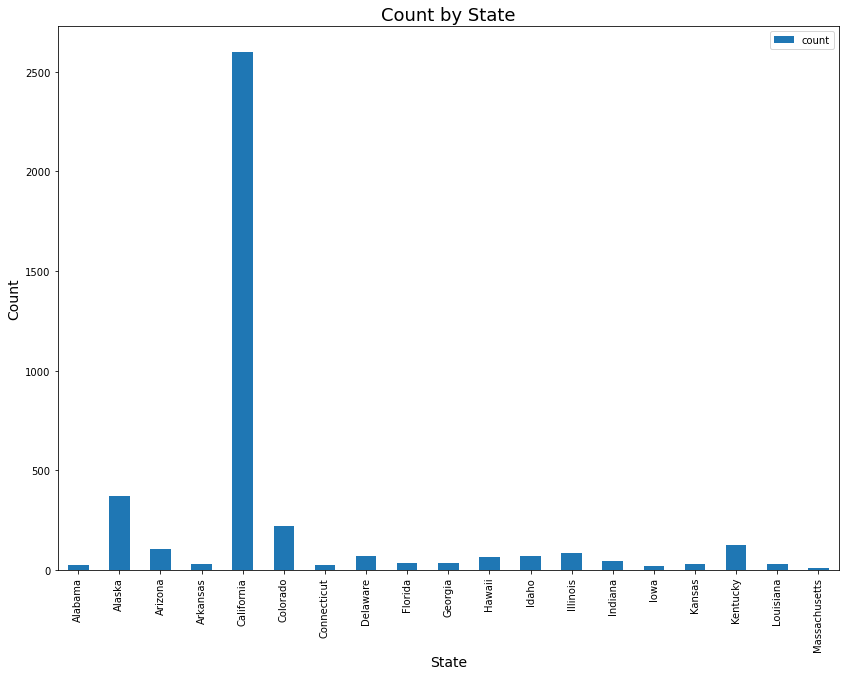

In [15]:
dfsc.plot(kind = 'bar', figsize = (14,10))  

plt.xlabel("State", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Count by State", fontsize = 18)

plt.show()

California, the state with the highest population in the US, also leads in cases of botulism. Massachusetts, which is less populated than California, is more populated than the average state, yet it has the fewest reported cases.

Let's take a look at what may affect California's numbers.

In [16]:
dfc = df[df['state'] == 'California']
dfc = dfc.reset_index(drop = True)
dfc.year.describe()

count     343.000000
mean     1979.014577
std        31.092812
min      1899.000000
25%      1955.000000
50%      1989.000000
75%      2004.000000
max      2017.000000
Name: year, dtype: float64

California has data from 1899 to 2017, which explains the high number - the more years one reports, the more cases are expected. The data is skewed in that it shows a greater number of more recent years, due to multiple types of botulism and multiple types of toxins being reported. Appearing 343 times, over the course of 111 years, California has an average of 3 types of botulism or toxin reported annually, leading to a naturally higher number (over one third of all data in the data set belongs to California).

In [17]:
dfm = df[df['state'] == 'Massachusetts']
dfm = dfm.reset_index(drop = True)
dfm.year.describe()

count       5.000000
mean     1928.200000
std        21.684096
min      1912.000000
25%      1913.000000
50%      1916.000000
75%      1938.000000
max      1962.000000
Name: year, dtype: float64

In contrast to California, Massachusetts has five years in the data set, without multiple types of botulism or toxins reported: 1912, 1913, 1916, 1938, and 1962. Next, let's look at Alaska, which has a less population than either California or Massachusetts, but a greater number of cases than Massachusetts.

In [18]:
dfa = df[df['state'] == 'Alaska']
dfa = dfa.reset_index(drop = True)
dfa.year.describe()

count      88.000000
mean     1988.943182
std        16.789678
min      1947.000000
25%      1977.000000
50%      1991.000000
75%      2001.250000
max      2017.000000
Name: year, dtype: float64

Alaska appears in this data set 88 times, beginning in 1947 (the year it became a state) and ending in 2017 (the end of the data set); similar to California, a greater number of appearances than the year range implies various types of toxins and botulisms that are reported.

## Conclusion

### Findings in the Data

Several conclusions are available from the data:
- Foodborne and Infant botulism are the most common types of botulism resulting in death.
- The average number of deaths per year has remained relatively constant for the past 80 years, with a peak roughly 100 years ago.
- California has the most deaths and longest range of years reported in the data set, while Massachusetts has the fewest of either. 

### Additional Questions / Further Research

#### Botulism by Type

Statistics have shown a pretty steady drop in infant mortality, yet this data shows an increase in infant death by botulism. 

Questions and additional data to compliment this notebook would include:

- What is the current infant mortality rate, and how has it changed since the beginning of the available data set?
- Could infant death by botulism have been counted as cases of SIDS or "Cot Death" in the past? Could a more current understanding of health and disease be able to more accurately label it as botulsim?

#### Botulism Deaths per Year

This data shows a trend of a relatively average number of deaths per year due to botulism, over the past 80 years, roughly. However, the US population has increased drastically, which doesn't change how many have died, but it changes what percent of the population has or does. 

Questions and additional data to compliment this notebook would include:

- How has the US population changed over the course of years listed in the botulism data set?
- What is the per capita rate of botulism death in the US during this year range? 
- Are there any external factors that could influence botulism deaths in certain years? Economic hardships, war, etc...?

#### Botulism by States

Similar to botulism deaths by year, a state with a high population would expect a higher number of deaths without necessarily being an outlier. Furthermore, as shown by this notebook, some states (in particular, California) have much better records of the number of botulism deaths, whereas other states have little data to show. 

Questions and additional data to compliment this notebook would include:
- What is the "death rate" of each state (number of deaths per year divided by the population), and how does the number of botulism deaths compare to each state's rate?
- Are there any external factors that could influence the rates of botulism? Poverty, lack of fresh food, harsh weather, etc...?